In [50]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from PIL import Image

In [51]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [52]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [53]:

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(train_images.reshape(-1, 28, 28, 1))

# Build the enhanced model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),          # Increased neurons
    layers.Dropout(0.3),                           # Dropout to prevent overfitting
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')         # Output layer
])


In [54]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
history = model.fit(datagen.flow(train_images.reshape(-1, 28, 28, 1), train_labels, batch_size=32),
                    epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
1875/1875 [==============================] - 24s 12ms/step - loss: 0.5684 - accuracy: 0.8184 - val_loss: 0.1381 - val_accuracy: 0.9569
Epoch 2/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3026 - accuracy: 0.9056 - val_loss: 0.1040 - val_accuracy: 0.9680
Epoch 3/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2626 - accuracy: 0.9197 - val_loss: 0.0888 - val_accuracy: 0.9739
Epoch 4/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2286 - accuracy: 0.9293 - val_loss: 0.0747 - val_accuracy: 0.9758
Epoch 5/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2231 - accuracy: 0.9321 - val_loss: 0.0718 - val_accuracy: 0.9779
Epoch 6/20
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2036 - accuracy: 0.9380 - val_loss: 0.0698 - val_accuracy: 0.9780
Epoch 7/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1971 - accuracy: 0.9389 - val_loss: 0.0725 -

In [56]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0511 - accuracy: 0.9851
Test accuracy: 0.9850999712944031


In [57]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


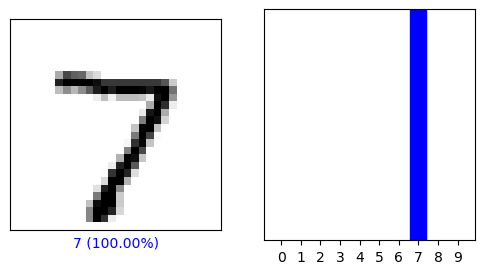

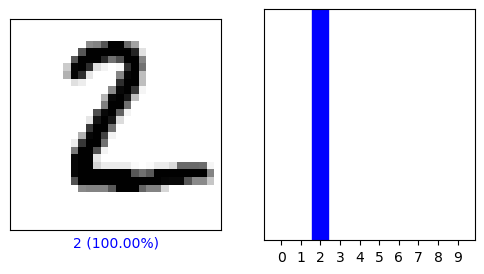

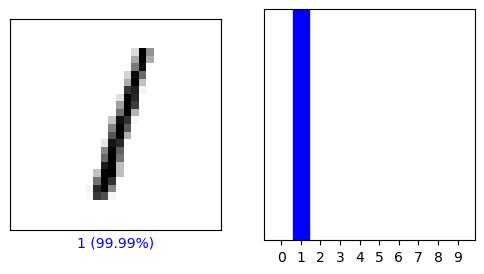

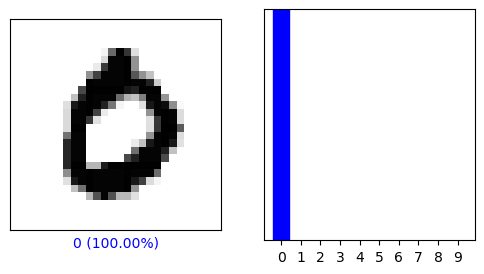

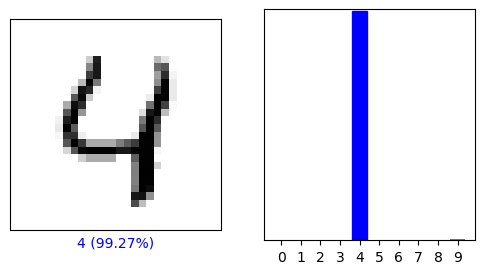

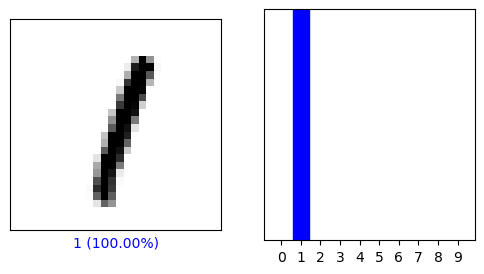

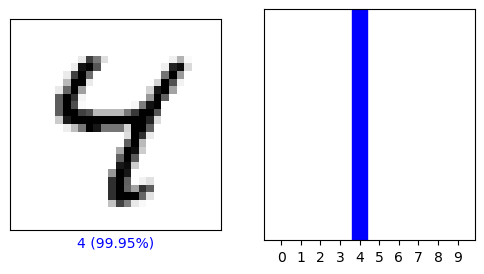

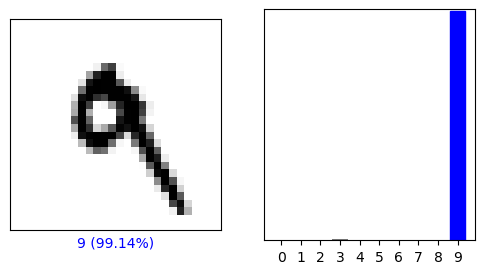

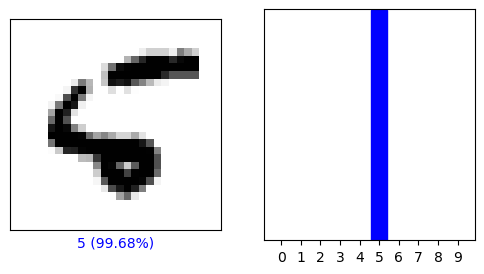

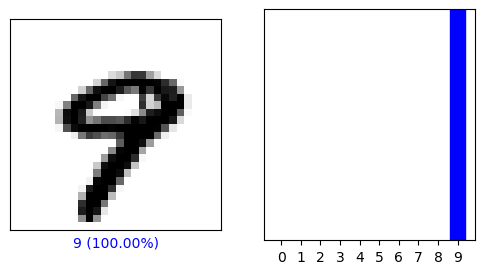

In [58]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{predicted_label} ({100*np.max(predictions_array):.2f}%)", color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
for i in range(0,10):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions, test_labels)
    plt.show()

In [59]:
def load_and_preprocess_image(image_path):
    # Load the image
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to 28x28 pixels
    img = np.array(img)  # Convert to a NumPy array
    img = 255 - img  # Invert colors to match MNIST format
    img = img / 255.0  # Normalize the pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

In [60]:
# Function to display the image and the prediction
def display_prediction(image_path):
    # Load and preprocess the image
    img = load_and_preprocess_image(image_path)

    # Make a prediction
    prediction = model.predict(img)
    predicted_label = np.argmax(prediction)

    # Display the original image with prediction
    img_display = Image.open(image_path)
    plt.imshow(img_display, cmap=plt.cm.gray)
    plt.title(f"Predicted Digit: {predicted_label}")
    plt.axis('off')
    plt.show()


1/1 [==============================] - 0s 85ms/step


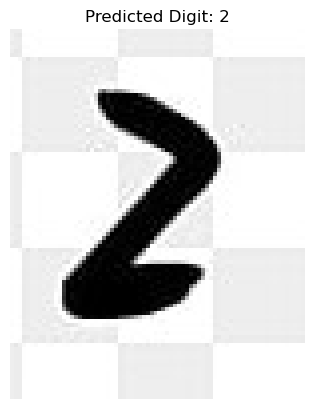

In [68]:
image_path = "C:/Users/ASUS/Downloads/2.jpg"  
display_prediction(image_path)

1/1 [==============================] - 0s 74ms/step


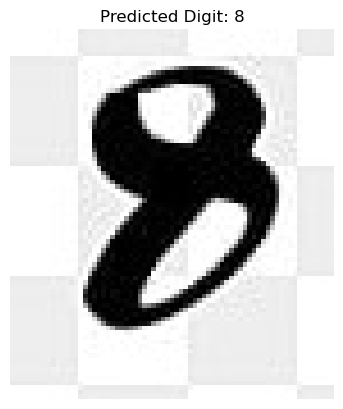

In [69]:
image_path = "C:/Users/ASUS/Downloads/8.jpg"  
display_prediction(image_path)

1/1 [==============================] - 0s 84ms/step


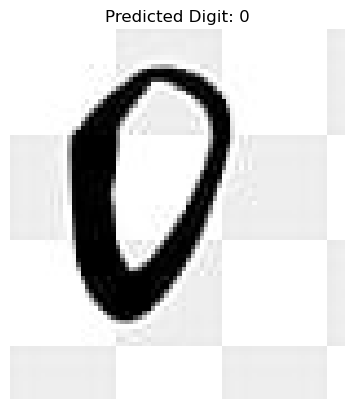

In [70]:
image_path = "C:/Users/ASUS/Downloads/0.jpg"  
display_prediction(image_path)

1/1 [==============================] - 0s 79ms/step


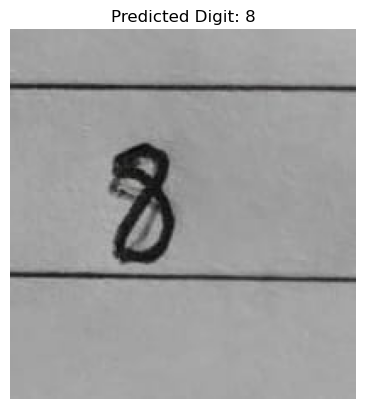

In [71]:
image_path = "C:/Users/ASUS/Downloads/eight.jpg"  
display_prediction(image_path)